In [12]:
import os
import sys
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [13]:
nx = 1024
ny = 1024

In [14]:
print(nx,ny)

1024 1024


In [15]:
X = np.zeros((nx,ny))
Y = np.zeros((nx,ny))

In [24]:
for i in range(nx):
    X[i,:] = 2.*np.pi*float(i/nx)
    
for j in range(ny):
    Y[:,j] = 2.*np.pi*float(j/ny)

In [25]:
def foo(x,y,lvl):
    taint = 0
    lx = x/(2.*np.pi)
    ly = y/(2.*np.pi)
    for k in range(lvl):
        digx = math.floor(3*lx)
        digy = math.floor(3*ly)
        if (digx==1)&(digy==1):
            return 0
        lx = (3.*lx-digx)
        ly = (3.*ly-digy)
    
    return 1

In [26]:
vfoo = np.vectorize(foo)

In [27]:
chi = vfoo(X,Y,5)

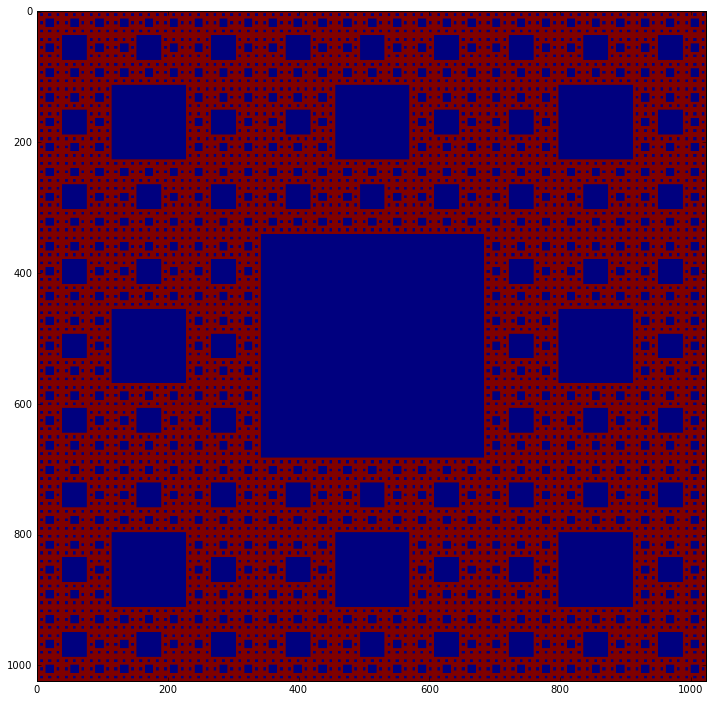

In [28]:
%matplotlib inline

plt.figure(figsize=(12,12))
plt.imshow(chi)

In [29]:
vFrac = np.average(chi)
nchi = (chi/(1024**2))/vFrac

In [30]:
cchi = np.fft.rfft2(nchi)

In [31]:
tmp = cchi*(cchi.conj())

In [32]:
corr = np.fft.irfft2(tmp)

In [33]:
corr[512:1024,:] = 0.
corr[:,512:1024] = 0.

print(corr)

[[  1.71533942e-06   1.63485625e-06   1.55437307e-06 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.63485625e-06   1.56814640e-06   1.50143655e-06 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.55437307e-06   1.50143655e-06   1.44850002e-06 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [34]:
r2 = X**2+Y**2
r2rt = np.sqrt(r2)
dx = (2.*np.pi)/1024.
ner = int(1024*np.sqrt(3))
rbins = np.linspace(-0.5*dx,2*np.pi*np.sqrt(3)+0.5*dx,ner+1)

In [35]:
rCorr,redges = np.histogram(r2rt,range=(0.5*dx,(ner+0.5)*dx),bins = rbins,weights=corr)

Sierpinsky carpet : Linear fit [alpha A] = [-1.06055712 -8.27561036]


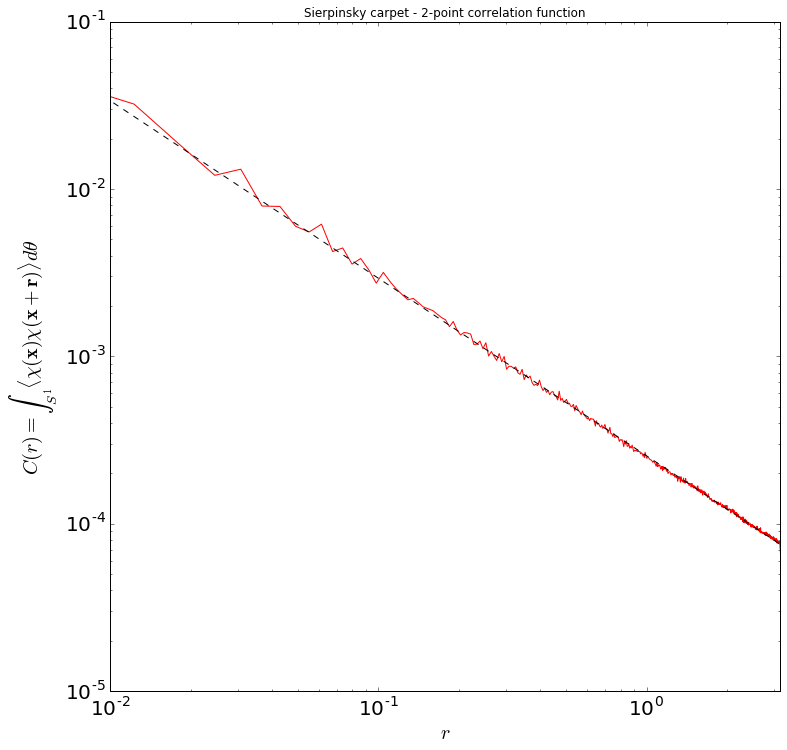

In [51]:
%matplotlib inline

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20) 
    
rp=np.linspace(1*dx,ner*dx,ner)
tempRp = rp[(rp>0.1)&(rp<1.0)]
plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$ C(r) = \int_{S^1} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\theta$', fontsize=20)

plt.xlim([10**(-2),np.pi])
plt.ylim([10**(-5),10**(-1)])

tempRp = rp[(rp>0.1)&(rp<3)]
tempCorr = rCorr[(rp>0.1)&(rp<3)]

fit = np.polyfit(np.log(tempRp),np.log((tempCorr)*(tempRp**(-2))),1)

print("Sierpinsky carpet : Linear fit [alpha A] = "+str(fit))

plt.title("Sierpinsky carpet - 2-point correlation function")
plt.loglog(rp,rCorr*(rp**(-2)),'r')
plt.loglog(rp,np.exp(fit[1])*(rp**(fit[0])),'k--')

In [40]:
thresholds = np.array([1,2,3,4,5,6,7,10,15,20,30,50])
exponents = np.array([-0.10275144,-0.18677595,-0.25415862,-0.31118905,-0.36117768,-0.40603394,-0.44704544,-0.55329358,-0.69308077,-0.80619096,-0.98860092,-1.26903382])

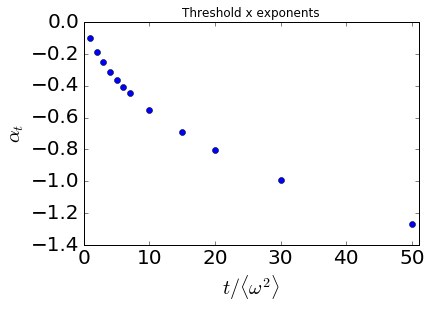

In [41]:
plt.title(r"Threshold x exponents")
plt.xlabel(r'$t/\langle \omega^2 \rangle$', fontsize=20)
plt.ylabel(r'$\alpha_t$', fontsize=20)
plt.xlim([0,51])
plt.plot(thresholds,exponents,'o')

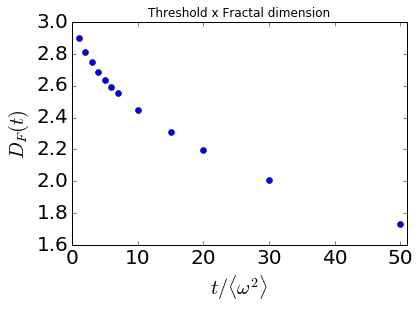

In [42]:
plt.title(r"Threshold x Fractal dimension")
plt.xlabel(r'$t/\langle \omega^2 \rangle$', fontsize=20)
plt.ylabel(r'$\alpha_t$', fontsize=20)
plt.xlim([0,51])

plt.ylabel(r'$D_F(t)$', fontsize=20)
plt.plot(thresholds,exponents+3,'o')

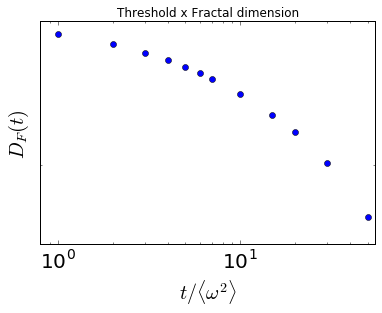

In [43]:
plt.title(r"Threshold x Fractal dimension")
plt.xlabel(r'$t/\langle \omega^2 \rangle$', fontsize=20)
plt.ylabel(r'$D_F(t)$', fontsize=20)

plt.xlim([0.8,55])
plt.ylim([1.6,3.0])

plt.loglog(thresholds,exponents+3,'o')

In [44]:
fit = np.polyfit(np.log(thresholds),np.log(exponents+3),2)

print(fit)

[-0.03342775  0.00697832  1.05143584]


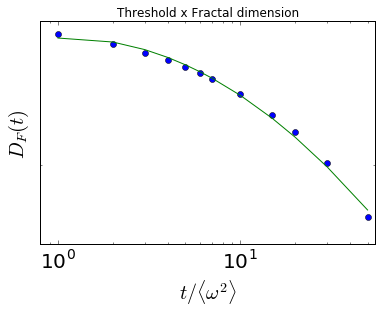

In [45]:
plt.title(r"Threshold x Fractal dimension")
plt.xlabel(r'$t/\langle \omega^2 \rangle$', fontsize=20)
plt.ylabel(r'$D_F(t)$', fontsize=20)

plt.xlim([0.8,55])
plt.ylim([1.6,3.0])

lt = np.log(thresholds)
ex = fit[2] + fit[1]*lt + fit[0]*(lt**2)
ft = np.exp(ex)

plt.loglog(thresholds,exponents+3,'o')
plt.loglog(thresholds,ft)